# Oops... Nothing Here..  So, you are on your own this time.

# Data 

In [0]:
#!pip install wget
#import wget

In [0]:
#wget.download("https://github.com/MIE451-1513-2019/course-datasets/raw/master/reviews.zip")
#!unzip reviews.zip

In [0]:
!pip install wget
import wget

import sys
print(sys.version)

!pip install twython

#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download('punkt')
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find



## Machine Learning
import sklearn
import sklearn.metrics as metrics

import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()

3.6.8 (default, Oct  7 2019, 12:59:55) 
[GCC 8.3.0]
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
##################################################################################################

## Q1. Sentiment Analysis and Aggregation

In [0]:
'''
import csv file
Hotels in city Irvine - max ratings 300
'''
column_names = ['link', 'hotel_name', 'reviews', 'rating', 'sentiment']
hotel_df = pd.read_csv('reviews.csv', header = None, names = column_names)

In [0]:
hotel_df.head()

,link,hotel_name,reviews,rating,sentiment
0,data\ca\32530\10373297\460828080.html,Homewood Suites by Hilton Irvine John Wayne Ai...,"""I Recommend this hotel to everyone. New Hotel...",5,positive
1,data\ca\32530\10373297\461011684.html,Homewood Suites by Hilton Irvine John Wayne Ai...,"""Brand new and very well designed hotel. We li...",4,positive
2,data\ca\32530\10373297\461297357.html,Homewood Suites by Hilton Irvine John Wayne Ai...,"""Our stay here started out a little rough. We ...",4,positive
3,data\ca\32530\10373297\461543739.html,Homewood Suites by Hilton Irvine John Wayne Ai...,"""I selected this hotel based upon a passed pos...",5,positive
4,data\ca\32530\10373297\461852837.html,Homewood Suites by Hilton Irvine John Wayne Ai...,"""Hopefully, I have an opportunity to visit aga...",5,positive


In [0]:
# hotel lists
hotel_df['hotel_name'].unique()

array(['Homewood Suites by Hilton Irvine John Wayne Airport',
       'AC Hotel by Marriott Irvine',
       'Global Luxury Suites at The Village',
       'Hyatt House Irvine/John Wayne Airport',
       'Marriott Irvine Spectrum',
       'Hampton Inn &amp; Suites Irvine-Orange County Airport',
       'SpringHill Suites Irvine John Wayne Airport/Orange County',
       'Extended Stay America - Orange County - Irvine Spectrum',
       'Residence Inn Irvine John Wayne Airport/Orange County',
       'Oakwood At The Charter', 'Courtyard by Marriott Irvine Spectrum',
       'Hilton Garden Inn Irvine / Orange County Airport',
       'Courtyard Irvine John Wayne Airport/Orange County',
       'Embassy Suites by Hilton Irvine - Orange County Airport',
       'Hotel Irvine', 'Irvine Marriott',
       'Hilton Irvine/Orange County Airport',
       'Candlewood Suites Orange County, Irvine Spectrum',
       'Atrium Hotel at Orange County Airport',
       'DoubleTree by Hilton Hotel Irvine - Spectrum',


In [0]:
# unique hotel numbers
hotel_df['hotel_name'].nunique()

32

In [0]:
# check null/nan values in dataframe
hotel_df.isnull().any()

link          False
hotel_name    False
reviews       False
rating        False
sentiment     False
dtype: bool

### **(a) Compute average Vader sentiment and average ground truth rating per hotel.**

In [0]:
# average ground truth rating per hotel
ground_mean_rating = hotel_df.groupby(['hotel_name']).mean()[['rating']].reset_index()
ground_mean_rating.columns = ['hotel_name', 'ground_avg_rating']
ground_mean_rating.sort_values(by = 'ground_avg_rating', ascending = 0).head(10)

,hotel_name,ground_avg_rating
27,Oakwood At The Charter,5.000000
19,Homewood Suites by Hilton Irvine John Wayne Ai...,4.796667
14,Hampton Inn &amp; Suites Irvine-Orange County ...,4.717791
21,Hyatt House Irvine/John Wayne Airport,4.618182
8,Courtyard by Marriott Irvine Spectrum,4.580645
0,AC Hotel by Marriott Irvine,4.562963
9,DoubleTree by Hilton Hotel Irvine - Spectrum,4.533333
18,Holiday Inn Santa Ana-Orange County Airport,4.358333
16,Hilton Garden Inn Irvine / Orange County Airport,4.343333
31,Wyndham Irvine-Orange County Airport,4.243333


In [0]:
# Use vader to evaluated sentiment of reviews
def evalSentences(sentences, to_df=False, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pd.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [0]:
reviews = hotel_df['reviews'].values
reviewDF = evalSentences(reviews, to_df=True, columns=['reviewCol','vader'])

100%|██████████| 5766/5766 [00:06<00:00, 890.36it/s]


In [0]:
reviewDF.head(10)

,reviewCol,vader
0,"""I Recommend this hotel to everyone. New Hotel...",0.9796
1,"""Brand new and very well designed hotel. We li...",0.4543
2,"""Our stay here started out a little rough. We ...",0.9585
3,"""I selected this hotel based upon a passed pos...",0.9571
4,"""Hopefully, I have an opportunity to visit aga...",0.9509
5,"""Great hotel with great staff this facility is...",0.9712
6,"""This is my first review on trip advisor and I...",0.9241
7,"""The best sperience ever went we opened the su...",0.9678
8,"""Brand new, super clean and spacious hotel. Th...",0.9678
9,"""I absolutely love it. I checked in when it wa...",0.9498


In [0]:
# add hotel name to the vader dataframe
hotel_df['vader_score'] = reviewDF.vader

In [0]:
hotel_df.head()

,link,hotel_name,reviews,rating,sentiment,vader_score
0,data\ca\32530\10373297\460828080.html,Homewood Suites by Hilton Irvine John Wayne Ai...,"""I Recommend this hotel to everyone. New Hotel...",5,positive,0.9796
1,data\ca\32530\10373297\461011684.html,Homewood Suites by Hilton Irvine John Wayne Ai...,"""Brand new and very well designed hotel. We li...",4,positive,0.4543
2,data\ca\32530\10373297\461297357.html,Homewood Suites by Hilton Irvine John Wayne Ai...,"""Our stay here started out a little rough. We ...",4,positive,0.9585
3,data\ca\32530\10373297\461543739.html,Homewood Suites by Hilton Irvine John Wayne Ai...,"""I selected this hotel based upon a passed pos...",5,positive,0.9571
4,data\ca\32530\10373297\461852837.html,Homewood Suites by Hilton Irvine John Wayne Ai...,"""Hopefully, I have an opportunity to visit aga...",5,positive,0.9509


In [0]:
# show avg Vader score rank
vader_mean_rating = hotel_df.groupby(['hotel_name']).mean()[['vader_score']].reset_index()
vader_mean_rating.columns = ['hotel_name', 'vader_avg_rating']
vader_mean_rating.sort_values(by = 'vader_avg_rating', ascending = 0).head()

,hotel_name,vader_avg_rating
19,Homewood Suites by Hilton Irvine John Wayne Ai...,0.884557
8,Courtyard by Marriott Irvine Spectrum,0.881146
14,Hampton Inn &amp; Suites Irvine-Orange County ...,0.878928
0,AC Hotel by Marriott Irvine,0.855282
18,Holiday Inn Santa Ana-Orange County Airport,0.834031


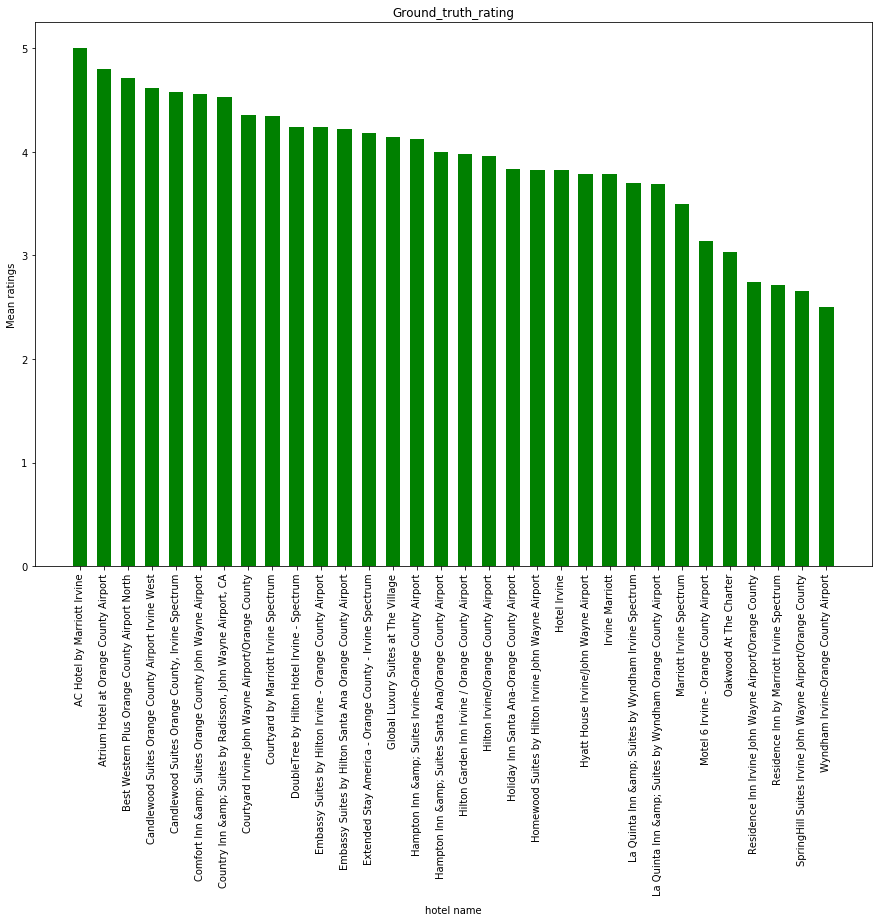

In [0]:
# plot the histgram plot shows different methods

hotelname1 = ground_mean_rating['hotel_name']
hotelname1 = list(hotelname1)

x1 = hotelname1
y1 = ground_mean_rating.sort_values(by = 'ground_avg_rating', ascending = 0)['ground_avg_rating'].values

x_pos1 = [i for i, _ in enumerate(x1)]

fig = plt.figure(figsize=(15,10))
plt.bar(x_pos1, y1, color='green', width = 0.6)
plt.xlabel("hotel name", labelpad = 10)
plt.ylabel("Mean ratings")
plt.title("Ground_truth_rating")

plt.xticks(x_pos1, x1, rotation= 'vertical')
plt.show()

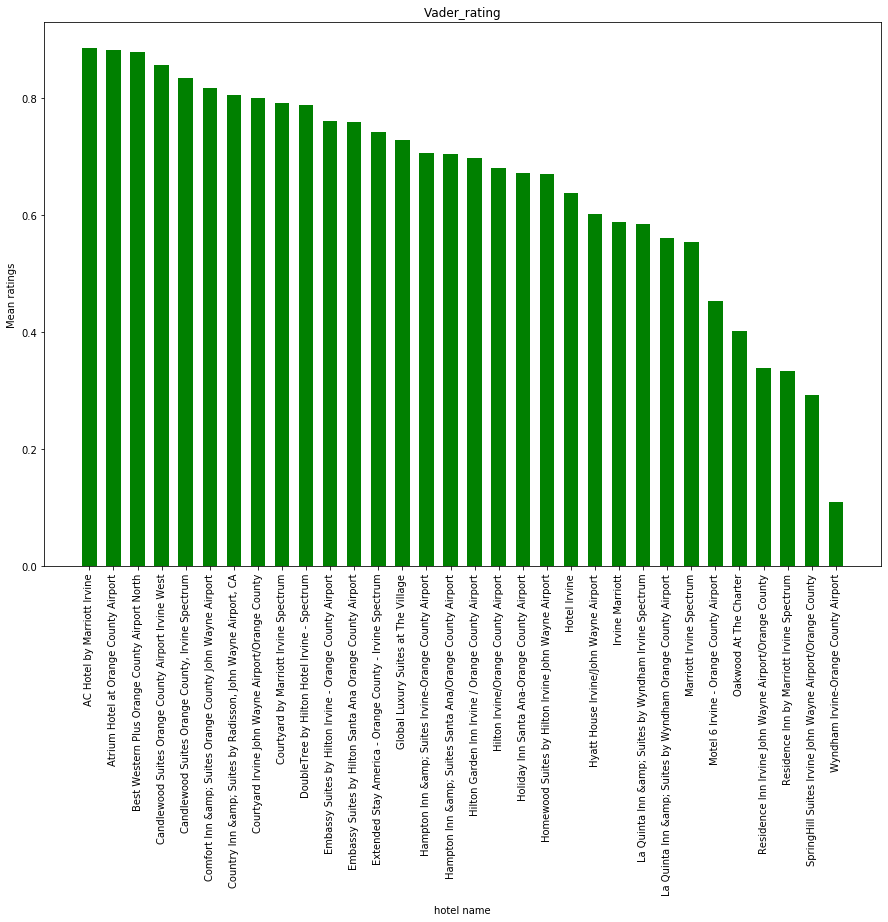

In [0]:
hotelname2 = vader_mean_rating['hotel_name']
hotelname2 = list(hotelname2)
x2 = hotelname2
y2 = vader_mean_rating.sort_values(by = 'vader_avg_rating', ascending = 0)['vader_avg_rating'].values

fig = plt.figure(figsize=(15,10))

x_pos2 = [i for i, _ in enumerate(x2)]


plt.bar(x_pos2, y2, color='green', width = 0.6)
plt.xlabel("hotel name", labelpad = 10)
plt.ylabel("Mean ratings")
plt.title("Vader_rating")

plt.xticks(x_pos2, x2, rotation= 'vertical')
plt.show()

# Q2. Frequency Analysis

In [0]:
import string
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer


### **(a) Use term frequency of the words for (i) positive reviews and (ii) negative with ground truth sentiment to rank the top-50 most frequent non-stopwords in the review collection. Do you note anything interesting and/or locale-specific about these top-ranked words?**

In [0]:
# clean txt and tokenize
# reference https://towardsdatascience.com/detecting-bad-customer-reviews-with-nlp-d8b36134dc7e

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [0]:
# applying function and clean data
hotel_df['review_clean'] = hotel_df['reviews'].apply(lambda x: clean_text(x))

In [0]:
hotel_df[['reviews', 'review_clean']].head()

,reviews,review_clean
0,"""I Recommend this hotel to everyone. New Hotel...",recommend hotel everyone new hotel clean staff...
1,"""Brand new and very well designed hotel. We li...",brand new well design hotel like everything ho...
2,"""Our stay here started out a little rough. We ...",stay start little rough adult child book one l...
3,"""I selected this hotel based upon a passed pos...",select hotel base upon passed positive experie...
4,"""Hopefully, I have an opportunity to visit aga...",hopefully opportunity visit near future suite ...


In [0]:
reviewDF = hotel_df[['vader_score', 'review_clean']]

In [0]:
# In this part, tokenize words from each review
from nltk import word_tokenize 
from wordcloud import WordCloud

# Note: You may want to use an NLTK tokenizer instead of a regular expression in the following
def dataFrameTransformation(sentiment, hotelDf, reviewDF, k):
    # positive sentiment
    if sentiment == 'positive':
        reviews = hotel_df[hotel_df['sentiment'] == 'positive']['review_clean'].values
            
        # Top-k frequent terms
        counter = Counter()
        for review in reviews:
                counter.update(word.lower() 
                                for word 
                                in word_tokenize(review) 
                                )
        topk = counter.most_common(k)
        topk_words = [i[0] for i in topk] 

    # negative sentiment
    if sentiment == 'negative':  
        reviews = hotel_df[hotel_df['sentiment'] == 'negative']['review_clean'].values
            
        # Top-k frequent terms
        counter = Counter()
        for review in reviews:
                counter.update(word.lower() 
                                for word 
                                in word_tokenize(review) 
                                )
        topk = counter.most_common(k)
        topk_words = [i[0] for i in topk]     

    # plot wordcloud
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 50,
        max_font_size = 50, 
        scale = 3,
        random_state = 42
    ).generate(str(topk_words))

    fig = plt.figure(1, figsize = (15, 10))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotel_name','rating','sentiment']].join(finalreviewDf)
    return topk, finaldf

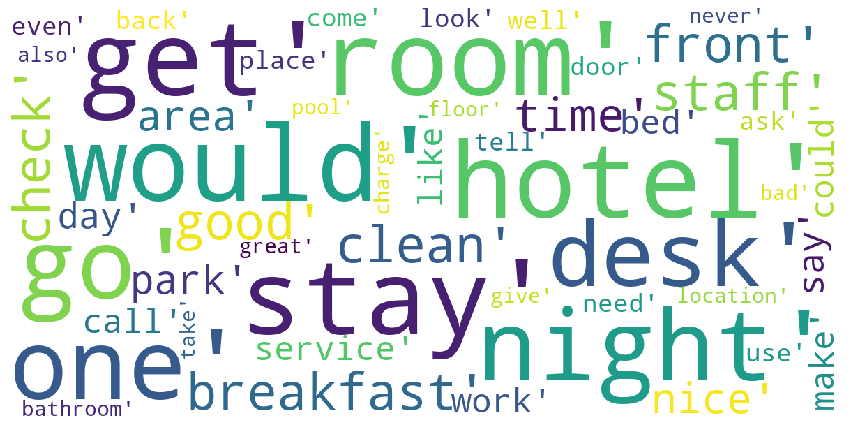

In [0]:
topk, finaldf = dataFrameTransformation('negative', hotel_df, reviewDF, 50)

In [0]:
############### from lab

In [0]:
#We are only intereseted in this three column for overall analysis
itemAnalysisDf = hotel_df[['review_clean','sentiment','vader_score']]

In [0]:
itemAnalysisDf = finaldf[['review_clean','sentiment','vader_score']]
def getTopK(df, k, label_value, label_column='sentiment', operation=operator.eq, value_column='review_clean'):
    stop = stopwords.words('english')
    #Add possible Stop Words for Hotel Reviews
    stop.append('hotel')
    stop.append('room')
    stop.append('rooms')
    stop.append('stay')
    stop.append('staff')
    counter = Counter()
    for review in df.loc[operation(df[label_column],label_value)][value_column]:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)
    return topk

In [0]:
topkGroundPos = getTopK(df=itemAnalysisDf, k=50, label_value='positive')

In [0]:
topkGroundPos

[('great', 2501),
 ('breakfast', 2139),
 ('clean', 2078),
 ('nice', 1830),
 ('good', 1604),
 ('area', 1508),
 ('friendly', 1284),
 ('service', 1207),
 ('make', 1185),
 ('would', 1153),
 ('well', 1119),
 ('airport', 1117),
 ('comfortable', 1061),
 ('one', 1040),
 ('get', 1036),
 ('time', 1036),
 ('location', 1024),
 ('night', 976),
 ('bed', 908),
 ('pool', 884),
 ('place', 865),
 ('like', 840),
 ('desk', 823),
 ('helpful', 812),
 ('also', 804),
 ('irvine', 800),
 ('need', 790),
 ('free', 780),
 ('park', 770),
 ('check', 767),
 ('restaurant', 764),
 ('day', 746),
 ('front', 742),
 ('close', 724),
 ('business', 718),
 ('food', 673),
 ('work', 670),
 ('even', 606),
 ('excellent', 592),
 ('recommend', 585),
 ('always', 583),
 ('really', 574),
 ('back', 572),
 ('nthe', 568),
 ('family', 555),
 ('come', 552),
 ('definitely', 547),
 ('best', 546),
 ('shuttle', 537),
 ('take', 535)]

In [0]:
topkGroundNeg = getTopK(df=itemAnalysisDf, k=50, label_value='negative')

In [0]:
topkGroundNeg

[('get', 976),
 ('would', 793),
 ('night', 730),
 ('one', 710),
 ('desk', 664),
 ('check', 645),
 ('breakfast', 639),
 ('good', 617),
 ('front', 617),
 ('clean', 585),
 ('time', 566),
 ('nice', 554),
 ('area', 541),
 ('day', 538),
 ('service', 533),
 ('park', 532),
 ('say', 521),
 ('work', 510),
 ('like', 502),
 ('bed', 498),
 ('call', 461),
 ('could', 455),
 ('make', 432),
 ('place', 429),
 ('need', 414),
 ('back', 405),
 ('ask', 404),
 ('even', 393),
 ('well', 378),
 ('look', 376),
 ('door', 374),
 ('tell', 373),
 ('come', 358),
 ('bathroom', 347),
 ('use', 342),
 ('great', 338),
 ('pool', 330),
 ('give', 325),
 ('location', 325),
 ('also', 321),
 ('charge', 317),
 ('floor', 313),
 ('never', 313),
 ('take', 312),
 ('bad', 306),
 ('find', 302),
 ('first', 301),
 ('next', 293),
 ('really', 271),
 ('leave', 268)]

In [0]:
topkVaderPos = getTopK(df=itemAnalysisDf, 
                       k=10, 
                       label_value=0, 
                       label_column='vader_score', 
                       operation=operator.gt)

In [0]:
topkVaderPos

[('great', 2771),
 ('breakfast', 2550),
 ('clean', 2464),
 ('nice', 2250),
 ('good', 2060),
 ('area', 1859),
 ('would', 1576),
 ('get', 1572),
 ('service', 1492),
 ('one', 1450)]

In [0]:
topkVaderNeg = getTopK(df=itemAnalysisDf, 
                       k=10, 
                       label_value=0, 
                       label_column='vader_score', 
                       operation=operator.lt)

In [0]:
topkVaderNeg

[('get', 433),
 ('would', 365),
 ('night', 349),
 ('desk', 334),
 ('check', 332),
 ('front', 313),
 ('one', 298),
 ('say', 274),
 ('time', 257),
 ('day', 252)]

### **(b) Repeat this analysis for the top-50 noun phrases and note any interesting results.**

In [0]:
tagger = PerceptronTagger()

In [0]:
positive_reviews = hotel_df[hotel_df['sentiment'] == 'positive']['review_clean'].values
positive_reviews

array(["recommend hotel everyone new hotel clean staff extremely helpful care kind hotel clerk always attentive family need day departure surprise son children's book sign staff year old birthday truly unexpected nice gift ever keep book forever memory thank",
       'brand new well design hotel like everything hotel except bed noisy probably poorly assemble since brand new hotel hope quickly fix problem',
       'stay start little rough adult child book one large suit fit th day get call inform problem room move two connect room queen bed problem however arrive told two room available move connect room king bed plus pull couch please honestly turn ok slept comfortably hotel make right knock decent amount bill hotel clean modern breakfast good staff great mean everyone front desk maintenance crew pool recreation area nice overall great stay mess room quickly forget highly recommend hotel',
       ...,
       'would definitely recommend hotel stay o.c great location hotel staff friendly

In [0]:
positive_reviews[1]

'brand new well design hotel like everything hotel except bed noisy probably poorly assemble since brand new hotel hope quickly fix problem'

In [0]:
# This grammar is described in the paper by S. N. Kim,
# T. Baldwin, and M.-Y. Kan.
# Evaluating n-gram based evaluation metrics for automatic
# keyphrase extraction.
# Technical report, University of Melbourne, Melbourne 2010.
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""

In [0]:
pos_tag = tagger.tag
tree = []
chunker = nltk.RegexpParser(grammar)
for sent in tqdm(positive_reviews):
    st = pos_tag(re.findall(r'\w+', sent))
    # positive_taggedToks.append(st)
    # Create phrase tree
    positive_taggedToks = chunker.parse(st)
    tree.append(positive_taggedToks)

100%|██████████| 4181/4181 [00:13<00:00, 303.91it/s]


In [0]:
tree[0:2]

[Tree('S', [('recommend', 'VB'), Tree('NP', [Tree('NBAR', [('hotel', 'NN'), ('everyone', 'NN'), ('new', 'JJ'), ('hotel', 'NN'), ('clean', 'JJ'), ('staff', 'NN')])]), ('extremely', 'RB'), Tree('NP', [Tree('NBAR', [('helpful', 'JJ'), ('care', 'NN'), ('kind', 'NN'), ('hotel', 'NN'), ('clerk', 'NN')])]), ('always', 'RB'), Tree('NP', [Tree('NBAR', [('attentive', 'JJ'), ('family', 'NN')])]), ('need', 'VBP'), Tree('NP', [Tree('NBAR', [('day', 'NN')])]), ('departure', 'VB'), Tree('NP', [Tree('NBAR', [('surprise', 'NN'), ('son', 'NN'), ('children', 'NNS')])]), ('s', 'VBP'), Tree('NP', [Tree('NBAR', [('book', 'NN'), ('sign', 'NN'), ('staff', 'NN'), ('year', 'NN'), ('old', 'JJ'), ('birthday', 'NN')])]), ('truly', 'RB'), Tree('NP', [Tree('NBAR', [('unexpected', 'JJ'), ('nice', 'JJ'), ('gift', 'NN')])]), ('ever', 'RB'), ('keep', 'VB'), Tree('NP', [Tree('NBAR', [('book', 'NN')])]), ('forever', 'RB'), Tree('NP', [Tree('NBAR', [('memory', 'NN'), ('thank', 'NN')])])]),
 Tree('S', [Tree('NP', [Tree('NBA

In [0]:
# Noun Phrase Extraction Support Functions
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stop_words)
    return accepted

# generator, create item once a time
def get_terms(tree):
    for leaf in leaves(tree):
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term
# Flatten phrase lists to get tokens for analysis
def flatten(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [0]:
def newDataFrameTransformation(sentiment, hotelDf, reviewDF, k):
    # positive sentiment
    if sentiment == 'positive':
        reviews = hotel_df[hotel_df['sentiment'] == 'positive']['review_clean'].values
            
        # Top-k frequent terms
        counter = Counter()
        for review in reviews:
                counter.update(flatten([word
                                for word 
                                in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                                ]))
        topk = counter.most_common(k)        
        #topk_words = [i[0] for i in topk] 

    # negative sentiment
    if sentiment == 'negative':  
        reviews = hotel_df[hotel_df['sentiment'] == 'negative']['review_clean'].values
            
        # Top-k frequent terms
        counter = Counter()
        for review in reviews:
                counter.update(flatten([word
                                for word 
                                in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                                ]))
        topk = counter.most_common(k)        
        #topk_words = [i[0] for i in topk]

    if sentiment == 'all':  
        reviews = hotel_df[hotel_df['sentiment'] == 'negative']['review_clean'].values
            
        # Top-k frequent terms
        counter = Counter()
        for review in reviews:
                counter.update(flatten([word
                                for word 
                                in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                                ]))
        topk = counter.most_common(k)        
        #topk_words = [i[0] for i in topk]


    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotel_name','rating','sentiment']].join(finalreviewDf)
    return topk, finaldf

In [0]:
topk_phrase, finaldf_phrase = newDataFrameTransformation('negative', hotel_df, reviewDF, 50)

In [0]:
finaldf_phrase.head()

,hotel_name,rating,sentiment,vader_score,review_clean,front desk,custom servic,stay hotel,park lot,next day,embassi suit,credit card,hotel stay,call front desk,night stay,room servic,bottl water,next time,nthe room,walk distanc,good thing,charg park,hotel room,room smell,nthi hotel,great locat,nthe hotel,free park,first day,bad experi,earli check,place stay,good place,good room,bad hotel,air condit,book hotel,star hotel,first night,first time,pool area,speak manag,nthe staff,pay park,front desk peopl,stay locat,room clean,john wayn airport,room door,front desk staff,room hotel,new room,orang counti airport,next door,good locat
0,Homewood Suites by Hilton Irvine John Wayne Ai...,5,positive,0.9796,recommend hotel everyone new hotel clean staff...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Homewood Suites by Hilton Irvine John Wayne Ai...,4,positive,0.4543,brand new well design hotel like everything ho...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Homewood Suites by Hilton Irvine John Wayne Ai...,4,positive,0.9585,stay start little rough adult child book one l...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Homewood Suites by Hilton Irvine John Wayne Ai...,5,positive,0.9571,select hotel base upon passed positive experie...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Homewood Suites by Hilton Irvine John Wayne Ai...,5,positive,0.9509,hopefully opportunity visit near future suite ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
topk_phrase

[('front desk', 37),
 ('custom servic', 18),
 ('stay hotel', 14),
 ('park lot', 14),
 ('next day', 10),
 ('embassi suit', 10),
 ('credit card', 10),
 ('hotel stay', 8),
 ('call front desk', 8),
 ('night stay', 8),
 ('room servic', 8),
 ('bottl water', 7),
 ('next time', 7),
 ('nthe room', 6),
 ('walk distanc', 6),
 ('good thing', 6),
 ('charg park', 6),
 ('hotel room', 6),
 ('room smell', 6),
 ('nthi hotel', 6),
 ('great locat', 5),
 ('nthe hotel', 5),
 ('free park', 5),
 ('first day', 5),
 ('bad experi', 5),
 ('earli check', 5),
 ('place stay', 5),
 ('good place', 5),
 ('good room', 5),
 ('bad hotel', 5),
 ('air condit', 5),
 ('book hotel', 5),
 ('star hotel', 5),
 ('first night', 5),
 ('first time', 5),
 ('pool area', 4),
 ('speak manag', 4),
 ('nthe staff', 4),
 ('pay park', 4),
 ('front desk peopl', 4),
 ('stay locat', 4),
 ('room clean', 4),
 ('john wayn airport', 4),
 ('room door', 4),
 ('front desk staff', 4),
 ('room hotel', 4),
 ('new room', 4),
 ('orang counti airport', 4),
 

In [0]:
topk_phrase, finaldf_phrase = newDataFrameTransformation('positive', hotel_df, reviewDF, 50)

In [0]:
finaldf_phrase.head()

,hotel_name,rating,sentiment,vader_score,review_clean,stay hotel,front desk,john wayn airport,nthe room,walk distanc,recommend hotel,orang counti,next time,nice hotel,great locat,nthe hotel,free breakfast,great place,hotel staff,night stay,first time,great place stay,great hotel,way help,front desk staff,custom servic,close airport,great experi,hotel stay,great staff,stay area,hotel irvin,good valu,earli check,hotel area,nthe staff,feel home,mani time,great job,room clean,pool area,hotel room,place stay,busi trip,second time,great stay,friendli staff,book hotel,extra mile,stay night,clean room,park lot,pleasant stay,free shuttl,great servic
0,Homewood Suites by Hilton Irvine John Wayne Ai...,5,positive,0.9796,recommend hotel everyone new hotel clean staff...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Homewood Suites by Hilton Irvine John Wayne Ai...,4,positive,0.4543,brand new well design hotel like everything ho...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Homewood Suites by Hilton Irvine John Wayne Ai...,4,positive,0.9585,stay start little rough adult child book one l...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Homewood Suites by Hilton Irvine John Wayne Ai...,5,positive,0.9571,select hotel base upon passed positive experie...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Homewood Suites by Hilton Irvine John Wayne Ai...,5,positive,0.9509,hopefully opportunity visit near future suite ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
topk_phrase

[('stay hotel', 41),
 ('front desk', 33),
 ('john wayn airport', 31),
 ('nthe room', 28),
 ('walk distanc', 25),
 ('recommend hotel', 24),
 ('orang counti', 23),
 ('next time', 22),
 ('nice hotel', 21),
 ('great locat', 21),
 ('nthe hotel', 20),
 ('free breakfast', 19),
 ('great place', 17),
 ('hotel staff', 17),
 ('night stay', 16),
 ('first time', 16),
 ('great place stay', 16),
 ('great hotel', 14),
 ('way help', 14),
 ('front desk staff', 14),
 ('custom servic', 13),
 ('close airport', 12),
 ('great experi', 12),
 ('hotel stay', 12),
 ('great staff', 12),
 ('stay area', 12),
 ('hotel irvin', 12),
 ('good valu', 12),
 ('earli check', 12),
 ('hotel area', 11),
 ('nthe staff', 11),
 ('feel home', 11),
 ('mani time', 11),
 ('great job', 11),
 ('room clean', 11),
 ('pool area', 10),
 ('hotel room', 10),
 ('place stay', 10),
 ('busi trip', 10),
 ('second time', 10),
 ('great stay', 10),
 ('friendli staff', 10),
 ('book hotel', 9),
 ('extra mile', 9),
 ('stay night', 9),
 ('clean room', 9

# Q3. Mutual Information

#### **(a) Use mutual information (MI) with ground truth sentiment to rank the top-50 most sentiment- bearing non-stopwords in the review collection. Do you note anything interesting and/or locale-specific about these top-ranked words?**


In [0]:
reviewDF.head()

,vader_score,review_clean
0,0.9796,recommend hotel everyone new hotel clean staff...
1,0.4543,brand new well design hotel like everything ho...
2,0.9585,stay start little rough adult child book one l...
3,0.9571,select hotel base upon passed positive experie...
4,0.9509,hopefully opportunity visit near future suite ...


In [0]:
# Note: You may want to use an NLTK tokenizer instead of a regular expression in the following
def MIdataFrameTransformation(hotelDf, reviewDF, k=50):
    reviews = reviewDF['review_clean'].values

    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update(word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            )
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotel_name','rating','sentiment']].join(finalreviewDf)
    return topk, finaldf

In [0]:
topk, finaldf = MIdataFrameTransformation(hotel_df, reviewDF, k=50)

In [0]:
# get Top K mutual information terms from the dataframe
def getMI(topk, finaldf, label_column='sentiment'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(finaldf[label_column], finaldf[word[0]])])
    miScoredf = pd.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

In [0]:
miScoredf = getMI(topk, finaldf)

In [0]:
miScoredf.head()
#not sufficient. does not show pos or neg

,Word,MI Score
5,great,0.030949
3,staff,0.019216
21,friendly,0.018758
11,get,0.016462
46,could,0.014343


### **(b) Repeat this analysis for the top-50 noun phrases and note any interesting results.**

In [0]:
def MInewDataFrameTransformation(hotelDf, reviewDF, k):

    reviews = hotel_df['review_clean'].values
        
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update(flatten([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(k)        
    #topk_words = [i[0] for i in topk] 

    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotel_name','rating','sentiment']].join(finalreviewDf)
    return topk, finaldf

In [0]:
topk_phrase, finaldf_phrase = MInewDataFrameTransformation(hotel_df, reviewDF, 50)

In [0]:
topk_phrase

[('front desk', 70),
 ('stay hotel', 55),
 ('john wayn airport', 35),
 ('nthe room', 34),
 ('walk distanc', 31),
 ('custom servic', 31),
 ('next time', 29),
 ('great locat', 26),
 ('nthe hotel', 25),
 ('recommend hotel', 24),
 ('night stay', 24),
 ('nice hotel', 24),
 ('orang counti', 24),
 ('park lot', 23),
 ('free breakfast', 22),
 ('first time', 21),
 ('hotel stay', 20),
 ('hotel staff', 20),
 ('great place', 18),
 ('front desk staff', 18),
 ('embassi suit', 18),
 ('great place stay', 17),
 ('earli check', 17),
 ('hotel room', 16),
 ('way help', 15),
 ('nthe staff', 15),
 ('hotel irvin', 15),
 ('good valu', 15),
 ('place stay', 15),
 ('mani time', 15),
 ('room clean', 15),
 ('book hotel', 14),
 ('pool area', 14),
 ('close airport', 14),
 ('great hotel', 14),
 ('great experi', 14),
 ('room servic', 13),
 ('hotel area', 13),
 ('great staff', 13),
 ('friendli staff', 13),
 ('stay night', 12),
 ('stay area', 12),
 ('busi trip', 12),
 ('good locat', 12),
 ('great stay', 12),
 ('credit ca

In [0]:
# get Top K mutual information terms from the dataframe
def getMIphrase(topk, finaldf, label_column='sentiment'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(finaldf_phrase[label_column], finaldf_phrase[word[0]])])
    miScoredf = pd.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Phrase','MI Score']
    return miScoredf

In [0]:
for word in topk_phrase:
  metrics.mutual_info_score(finaldf_phrase['sentiment'], finaldf_phrase[word[0]])

In [0]:
miScoredf = getMIphrase(topk_phrase, finaldf_phrase)

In [0]:
miScoredf.head(10)

,Phrase,MI Score
9,recommend hotel,0.001341
0,front desk,0.001209
45,credit card,0.001037
13,park lot,0.000836
12,orang counti,0.000788
34,great hotel,0.000782
5,custom servic,0.000735
41,stay area,0.000670
49,feel home,0.000614
36,room servic,0.000570



# Q4. Pointwise Mutual Information

#### **(a) For ground truth sentiment, calculate the top-50 words according to PMI of the word occuring with (i) positive reviews and (ii) negative reviews. Do you note anything interesting and/or locale-specific about these top-ranked words?**


In [0]:
finaldf.head()

,hotel_name,rating,sentiment,vader_score,review_clean,room,hotel,stay,staff,n,great,breakfast,clean,nice,good,area,get,would,one,service,night,go,make,time,well,desk,friendly,check,bed,airport,front,location,like,park,place,day,comfortable,pool,need,work,also,free,even,back,close,irvine,helpful,business,restaurant,come,food,could,take,really,look
0,Homewood Suites by Hilton Irvine John Wayne Ai...,5,positive,0.9796,recommend hotel everyone new hotel clean staff...,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,Homewood Suites by Hilton Irvine John Wayne Ai...,4,positive,0.4543,brand new well design hotel like everything ho...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Homewood Suites by Hilton Irvine John Wayne Ai...,4,positive,0.9585,stay start little rough adult child book one l...,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Homewood Suites by Hilton Irvine John Wayne Ai...,5,positive,0.9571,select hotel base upon passed positive experie...,1,1,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Homewood Suites by Hilton Irvine John Wayne Ai...,5,positive,0.9509,hopefully opportunity visit near future suite ...,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [0]:
# using Pair_wise Mutual Information (PMI)

In [0]:
# Simple example of getting pairwise mutual information of a term
def pmiCal(df, x):
    pmilist=[]
    for i in ['positive','negative']:
        for j in [0,1]:
            px = sum(df['sentiment']==i)/len(df)
            py = sum(df[x]==j)/len(df)
            pxy = len(df[(df['sentiment']==i) & (df[x]==j)])/len(df)
            if pxy==0:#Log 0 cannot happen
                pmi = math.log((pxy+0.0001)/(px*py))
            else:
                pmi = math.log(pxy/(px*py))
            pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
    pmidf = pd.DataFrame(pmilist)
    pmidf.columns = ['x','y','px','py','pxy','pmi']
    return pmidf

In [0]:
def pmiIndivCal(df,x,gt, label_column='sentiment'):
    px = sum(df[label_column]==gt)/len(df)
    py = sum(df[x]==1)/len(df)
    pxy = len(df[(df[label_column]==gt) & (df[x]==1)])/len(df)
    if pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)/(px*py))
    else:
        pmi = math.log(pxy/(px*py))
    return pmi

In [0]:
# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, label_column='sentiment', topk=topk):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    pmilist = []
    pmiposlist = []
    pmineglist = []
    for word in tqdm(topk):
        pmilist.append([word[0]]+[pmiCal(df,word[0])])
        pmiposlist.append([word[0]]+[pmiIndivCal(df,word[0],'positive',label_column)])
        pmineglist.append([word[0]]+[pmiIndivCal(df,word[0],'negative',label_column)])
    pmidf = pd.DataFrame(pmilist)
    pmiposlist = pd.DataFrame(pmiposlist)
    pmineglist = pd.DataFrame(pmineglist)
    pmiposlist.columns = ['word','pmi']
    pmineglist.columns = ['word','pmi']
    pmidf.columns = ['word','pmi']
    return pmiposlist, pmineglist, pmidf

In [0]:
pmiposlist, pmineglist, pmidf = pmiForAllCal(finaldf)

100%|██████████| 50/50 [00:01<00:00, 35.69it/s]


i) ground truth positive

In [0]:
#Sorted top pmi words for positive reviews
pmiposlist.sort_values('pmi',ascending=0).head(10)

,word,pmi
21,friendly,0.185358
5,great,0.183667
41,helpful,0.179534
31,comfortable,0.169346
40,irvine,0.143243
43,restaurant,0.143119
24,airport,0.123376
3,staff,0.122448
7,clean,0.103241
36,free,0.087459


ii) ground truth negative

In [0]:
#Sorted top pmi words for negative reviews
pmineglist.sort_values('pmi',ascending=0).head(10)

,word,pmi
46,could,0.569755
11,get,0.433579
49,look,0.403254
22,check,0.381122
34,work,0.356077
30,day,0.354186
25,front,0.344941
15,night,0.333338
37,even,0.322864
20,desk,0.322541


#### **(b) Repeat this analysis for the top-50 noun phrases and note any interesting results.**

In [0]:
# Flatten phrase lists to get tokens for analysis
def flatten(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [0]:
# Revise the previous dataframe transform function...
def newDataFrameTransformation(hotelDf, reviewDF, k=50):
    reviews = reviewDF['reviewCol'].values
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update(flatten([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return topk, finaldf

In [0]:
pmiposlist, pmineglist, pmidf = pmiForAllCal(finaldf_phrase, topk=topk_phrase)

100%|██████████| 50/50 [00:01<00:00, 37.08it/s]


i) positive PMI phrase

In [0]:
pmiposlist.sort_values('pmi',ascending=0).head(5)

,word,pmi
49,feel home,0.321428
34,great hotel,0.321428
41,stay area,0.321428
9,recommend hotel,0.321428
12,orang counti,0.278869


ii) negative PMI phrase

In [0]:
pmineglist.sort_values('pmi',ascending=0).head(5)

,word,pmi
45,credit card,1.068251
36,room servic,0.805886
13,park lot,0.765301
20,embassi suit,0.703608
5,custom servic,0.667240


In [0]:
#Complete pmi dataframe
pmidf.head()

,word,pmi
0,front desk,x y px py pxy ...
1,stay hotel,x y px py pxy ...
2,john wayn airport,x y px py pxy ...
3,nthe room,x y px py pxy ...
4,walk distanc,x y px py pxy ...


#### **(c) Repeat this analysis for the single top and single bottom hotel (according to the ground truth rating). Do you gain any useful hotel-specific insights about what is good and bad about these two hotels? If not, explain why not.**

i) single word

In [0]:
topbot_hotel = hotel_df[(hotel_df['hotel_name'] == 'Wyndham Irvine-Orange County Airport') | (hotel_df['hotel_name'] == 'AC Hotel by Marriott Irvine')]

In [0]:
topbot_hotel.head()

,link,hotel_name,reviews,rating,sentiment,vader_score,review_clean
300,data\ca\32530\11914822\473325085.html,AC Hotel by Marriott Irvine,"""Night shift manager Michael Williams will sim...",5,positive,0.8620,night shift manager michael williams simply go...
301,data\ca\32530\11914822\474845686.html,AC Hotel by Marriott Irvine,"""I came into the AC hotel today just to take a...",5,positive,0.9600,come ac hotel today take look lobby i've hear ...
302,data\ca\32530\11914822\477802928.html,AC Hotel by Marriott Irvine,"""I had drinks with some business associates an...",5,positive,0.9643,drink business associate pleasure serve clinto...
303,data\ca\32530\11914822\477808681.html,AC Hotel by Marriott Irvine,"""This is a lovely new property that is trying ...",4,positive,0.8376,lovely new property try hard european modular ...
304,data\ca\32530\11914822\477990192.html,AC Hotel by Marriott Irvine,"""This is a great new hotel in the OC! I arriv...",5,positive,0.9587,great new hotel oc arrive long day travel fron...


In [0]:
topk, finaldf = MIdataFrameTransformation(topbot_hotel, reviewDF, k=50)

In [0]:
pmiposlist, pmineglist, pmidf = pmiForAllCal(finaldf)

100%|██████████| 50/50 [00:00<00:00, 67.89it/s]


In [0]:
#Sorted top pmi words for positive reviews
pmiposlist.sort_values('pmi',ascending=0).head(10)

,word,pmi
41,helpful,0.150734
5,great,0.120743
40,irvine,0.116619
21,friendly,0.111383
31,comfortable,0.106019
43,restaurant,0.101014
39,close,0.098270
24,airport,0.089302
3,staff,0.083382
32,pool,0.074173


In [0]:
#Sorted top pmi words for negative reviews
pmineglist.sort_values('pmi',ascending=0).head(10)

,word,pmi
46,could,0.910878
49,look,0.674403
37,even,0.608412
11,get,0.535652
48,really,0.463740
28,park,0.408373
30,day,0.373133
12,would,0.349184
27,like,0.312509
16,go,0.295117


# Q5. General Plots

#### **(a) Histogram**

#### **(a) Show separate histograms of ground truth and Vader sentiment scores (ignore hotel ID). Do you notice any interesting differences?**

In [0]:
topk, finaldf = MIdataFrameTransformation(hotel_df, reviewDF, k=50)

In [0]:
def getHistogram(measure, title):
    if measure=='both':
        x = [finaldf['rating'].values/5]
        y = [finaldf['vader_score'].values]
        bins = np.linspace(-1, 1, 100)
        plt.title(title)
        plt.hist(x, bins, label='x')
        plt.hist(y, bins, label='y')
        plt.legend(loc='upper right')
        plt.show()
    
    else:
        plt.hist(finaldf[measure].values)
        plt.title(title)
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        fig = plt.gcf()

In [0]:
finaldf.head()

,hotel_name,rating,sentiment,vader_score,review_clean,room,hotel,stay,staff,n,great,breakfast,clean,nice,good,area,get,would,one,service,night,go,make,time,well,desk,friendly,check,bed,airport,front,location,like,park,place,day,comfortable,pool,need,work,also,free,even,back,close,irvine,helpful,business,restaurant,come,food,could,take,really,look
0,Homewood Suites by Hilton Irvine John Wayne Ai...,5,positive,0.9796,recommend hotel everyone new hotel clean staff...,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,Homewood Suites by Hilton Irvine John Wayne Ai...,4,positive,0.4543,brand new well design hotel like everything ho...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Homewood Suites by Hilton Irvine John Wayne Ai...,4,positive,0.9585,stay start little rough adult child book one l...,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Homewood Suites by Hilton Irvine John Wayne Ai...,5,positive,0.9571,select hotel base upon passed positive experie...,1,1,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Homewood Suites by Hilton Irvine John Wayne Ai...,5,positive,0.9509,hopefully opportunity visit near future suite ...,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


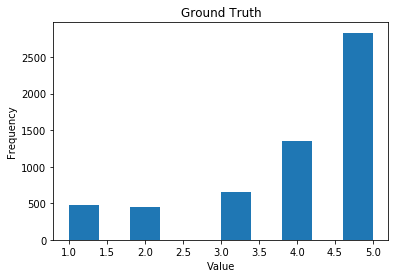

In [0]:
getHistogram('rating', 'Ground Truth')

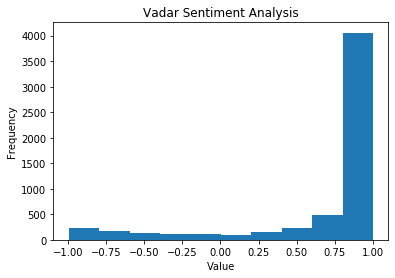

In [0]:
getHistogram('vader_score', 'Vadar Sentiment Analysis')

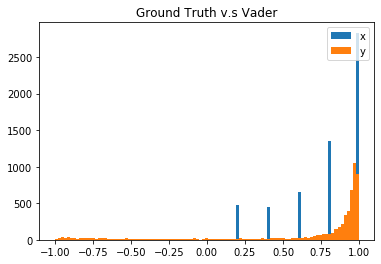

In [0]:
getHistogram('both', 'Ground Truth v.s Vader')
# x is rating y is vader

#### **(b) Show a histogram of the number of reviews per hotel. Do you notice any interesting trends? Are these expected?**


In [0]:
# show count of hotel reviews
review_counts = hotel_df.groupby(['hotel_name']).count().reset_index()[['hotel_name', 'reviews']]
review_counts.columns = ['hotel_name', 'review_counts']
review_counts.sort_values(by = 'review_counts', ascending = 0)

,hotel_name,review_counts
16,Hilton Garden Inn Irvine / Orange County Airport,300
10,Embassy Suites by Hilton Irvine - Orange Count...,300
24,La Quinta Inn &amp; Suites by Wyndham Orange C...,300
23,La Quinta Inn &amp; Suites by Wyndham Irvine S...,300
20,Hotel Irvine,300
19,Homewood Suites by Hilton Irvine John Wayne Ai...,300
17,Hilton Irvine/Orange County Airport,300
15,Hampton Inn &amp; Suites Santa Ana/Orange Coun...,300
11,Embassy Suites by Hilton Santa Ana Orange Coun...,300
31,Wyndham Irvine-Orange County Airport,300


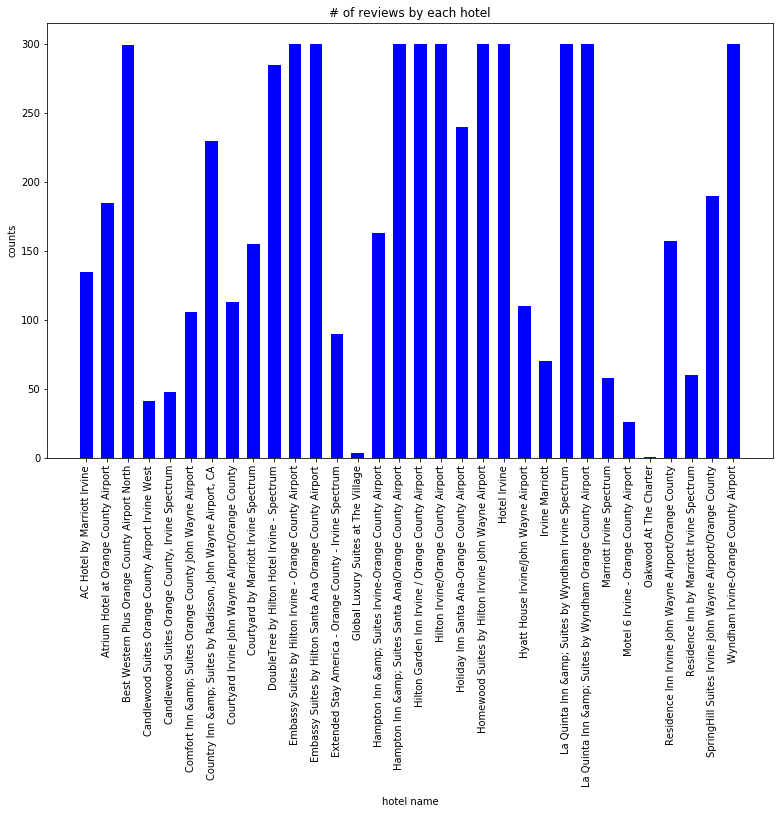

In [0]:
# plot the histgram plot shows different methods

hotelname1 = review_counts['hotel_name']
hotelname1 = list(hotelname1)

x1 = hotelname1
y1 = review_counts.review_counts
#print(y1)

x_pos1 = [i for i, _ in enumerate(x1)]

fig = plt.figure(figsize=(13,8))
plt.bar(x_pos1, y1, color='blue', width = 0.6)
plt.xlabel("hotel name", labelpad = 10)
plt.ylabel("counts")
plt.title("# of reviews by each hotel")

plt.xticks(x_pos1, x1, rotation= 'vertical')
plt.show()

#### **(b) Boxplots**

#### **(a) In two plots, one for ground truth star rating and one for Vader sentiment, show a plot of 5 side-by-side boxplots of these scores.**

In [0]:
vader_mean_rating.sort_values(by = 'vader_avg_rating', ascending = 0).head()

,hotel_name,vader_avg_rating
19,Homewood Suites by Hilton Irvine John Wayne Ai...,0.884557
8,Courtyard by Marriott Irvine Spectrum,0.881146
14,Hampton Inn &amp; Suites Irvine-Orange County ...,0.878928
0,AC Hotel by Marriott Irvine,0.855282
18,Holiday Inn Santa Ana-Orange County Airport,0.834031


In [0]:
ground_mean_rating.sort_values(by = 'ground_avg_rating', ascending = 0).head(6)

,hotel_name,ground_avg_rating
27,Oakwood At The Charter,5.000000
19,Homewood Suites by Hilton Irvine John Wayne Ai...,4.796667
14,Hampton Inn &amp; Suites Irvine-Orange County ...,4.717791
21,Hyatt House Irvine/John Wayne Airport,4.618182
8,Courtyard by Marriott Irvine Spectrum,4.580645
0,AC Hotel by Marriott Irvine,4.562963


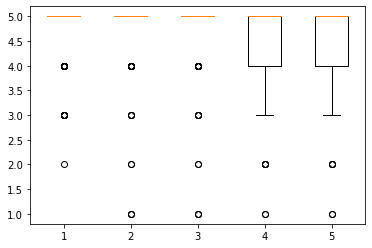

In [0]:
#Plot top 5 side-by-side boxplot for top 5 ground truth rated hotel
tp5gthotel = ground_mean_rating.sort_values('ground_avg_rating',ascending=0).head(6)
tp5gthotel['hotel_name'].values

Homewood = finaldf.loc[finaldf['hotel_name'] == tp5gthotel['hotel_name'].values[1]]['rating']
HamptonInnamp = finaldf.loc[finaldf['hotel_name'] == tp5gthotel['hotel_name'].values[2]]['rating']
HyattHouseIrvine = finaldf.loc[finaldf['hotel_name'] == tp5gthotel['hotel_name'].values[3]]['rating']
Courtyard = finaldf.loc[finaldf['hotel_name'] == tp5gthotel['hotel_name'].values[4]]['rating']
ACHotel = finaldf.loc[finaldf['hotel_name'] == tp5gthotel['hotel_name'].values[5]]['rating']

data = [Homewood, HamptonInnamp, HyattHouseIrvine, Courtyard, ACHotel]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)
plt.show()

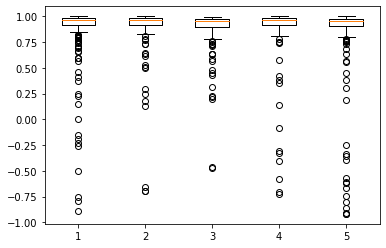

In [0]:
#Plot top 5 side-by-side boxplot for top 5  vader rated hotel
tp5gthotel = vader_mean_rating.sort_values('vader_avg_rating',ascending=0).head(5)
tp5gthotel['hotel_name'].values

Homewood = finaldf.loc[finaldf['hotel_name'] == tp5gthotel['hotel_name'].values[0]]['vader_score']
HamptonInnamp = finaldf.loc[finaldf['hotel_name'] == tp5gthotel['hotel_name'].values[1]]['vader_score']
HyattHouseIrvine = finaldf.loc[finaldf['hotel_name'] == tp5gthotel['hotel_name'].values[2]]['vader_score']
Courtyard = finaldf.loc[finaldf['hotel_name'] == tp5gthotel['hotel_name'].values[3]]['vader_score']
ACHotel = finaldf.loc[finaldf['hotel_name'] == tp5gthotel['hotel_name'].values[4]]['vader_score']

data = [Homewood, HamptonInnamp, HyattHouseIrvine, Courtyard, ACHotel]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)
plt.show()

#### **(b) Report the mean and variance of the ground truth and Vader sentiment scores for the top-5 ranked hotels according to star rating.**

In [0]:
#Plot top 5 side-by-side boxplot for top 5 ground truth rated hotel
tp5gthotel = ground_mean_rating.sort_values('ground_avg_rating',ascending=0).head(6)
tp5gthotel['hotel_name'].values

a = finaldf.loc[finaldf['hotel_name'] == tp5gthotel['hotel_name'].values[1]]['rating']
b = finaldf.loc[finaldf['hotel_name'] == tp5gthotel['hotel_name'].values[2]]['rating']
c = finaldf.loc[finaldf['hotel_name'] == tp5gthotel['hotel_name'].values[3]]['rating']
d = finaldf.loc[finaldf['hotel_name'] == tp5gthotel['hotel_name'].values[4]]['rating']
e = finaldf.loc[finaldf['hotel_name'] == tp5gthotel['hotel_name'].values[5]]['rating']


In [0]:
print(np.mean(a))
print(np.mean(b))
print(np.mean(c))
print(np.mean(d))
print(np.mean(e))

4.796666666666667
4.717791411042945
4.618181818181818
4.580645161290323
4.562962962962963


In [0]:
print(np.var(a))
print(np.var(b))
print(np.var(c))
print(np.var(d))
print(np.var(e))

0.24198888888888856
0.5461251834845122
0.7451239669421503
0.6434963579604548
0.7052949245541842


In [0]:
#Plot top 5 side-by-side boxplot for top 5  vader rated hotel
tp5gthotel = vader_mean_rating.sort_values('vader_avg_rating',ascending=0).head(5)
tp5gthotel['hotel_name'].values

a = finaldf.loc[finaldf['hotel_name'] == tp5gthotel['hotel_name'].values[0]]['vader_score']
b = finaldf.loc[finaldf['hotel_name'] == tp5gthotel['hotel_name'].values[1]]['vader_score']
c = finaldf.loc[finaldf['hotel_name'] == tp5gthotel['hotel_name'].values[2]]['vader_score']
d = finaldf.loc[finaldf['hotel_name'] == tp5gthotel['hotel_name'].values[3]]['vader_score']
e = finaldf.loc[finaldf['hotel_name'] == tp5gthotel['hotel_name'].values[4]]['vader_score']

In [0]:
print(np.mean(a))
print(np.mean(b))
print(np.mean(c))
print(np.mean(d))
print(np.mean(e))

0.8845573333333331
0.8811458064516132
0.8789276073619632
0.8552822222222219
0.8340308333333334


In [0]:
print(np.var(a))
print(np.var(b))
print(np.var(c))
print(np.var(d))
print(np.var(e))

0.06860533237955553
0.06957719770822061
0.04425044248936732
0.11062418886913582
0.1481028719659722


#### **(c) Scatterplots and heatmaps**

#### **(a) Show both a scatterplot and heatmap of ground truth score (star rating) versus Vader sentiment score. Each review is a point on the scatterplot. Do you notice anything interesting? What does this tell you about star ratings vs. Vader sentiment scores?**
#### **What does this tell you about human ratings and/or Vader sentiment analysis?**

Text(0.5, 0, 'Vader Score')

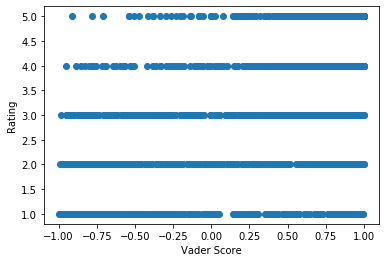

In [0]:
y = finaldf['rating'].values
x = finaldf['vader_score'].values
plt.plot(x, y,"o")
plt.ylabel('Rating')
plt.xlabel('Vader Score')

In [0]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Text(0, 0.5, 'Rating')

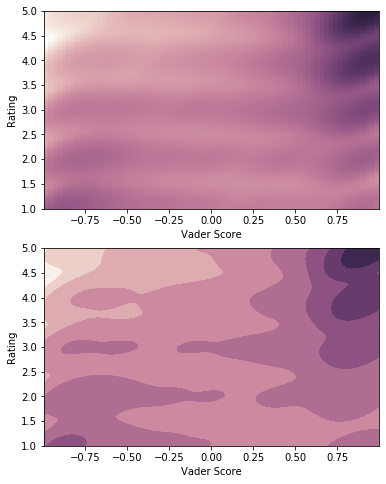

In [0]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

#### **b) scatterplots and heatmap of review length vs. score**

In [0]:
hotel_df['review_length'] = 0
for x in range(len(hotel_df['reviews'])):
    hotel_df['review_length'][x] = len(hotel_df['reviews'][x])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
hotel_df.head()

,link,hotel_name,reviews,rating,sentiment,vader_score,review_clean,review_length
0,data\ca\32530\10373297\460828080.html,Homewood Suites by Hilton Irvine John Wayne Ai...,"""I Recommend this hotel to everyone. New Hotel...",5,positive,0.9796,recommend hotel everyone new hotel clean staff...,393
1,data\ca\32530\10373297\461011684.html,Homewood Suites by Hilton Irvine John Wayne Ai...,"""Brand new and very well designed hotel. We li...",4,positive,0.4543,brand new well design hotel like everything ho...,248
2,data\ca\32530\10373297\461297357.html,Homewood Suites by Hilton Irvine John Wayne Ai...,"""Our stay here started out a little rough. We ...",4,positive,0.9585,stay start little rough adult child book one l...,942
3,data\ca\32530\10373297\461543739.html,Homewood Suites by Hilton Irvine John Wayne Ai...,"""I selected this hotel based upon a passed pos...",5,positive,0.9571,select hotel base upon passed positive experie...,723
4,data\ca\32530\10373297\461852837.html,Homewood Suites by Hilton Irvine John Wayne Ai...,"""Hopefully, I have an opportunity to visit aga...",5,positive,0.9509,hopefully opportunity visit near future suite ...,402


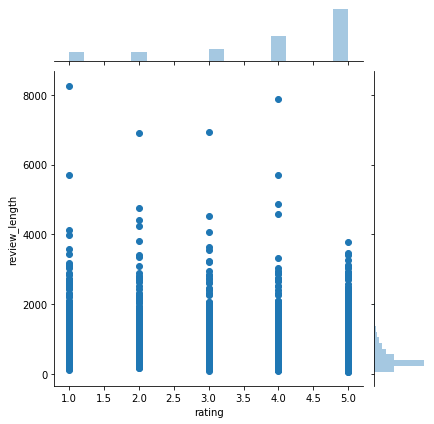

In [0]:
sns.jointplot(x = hotel_df['rating'], y = hotel_df['review_length'], kind = 'scatter')

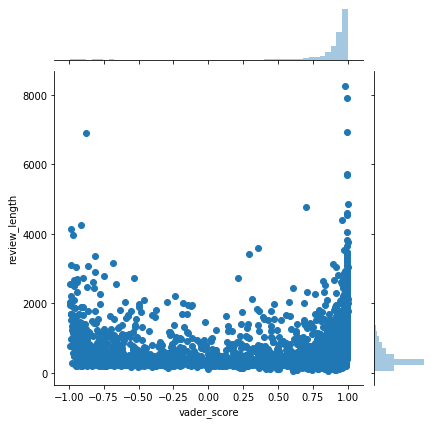

In [0]:
sns.jointplot(x = hotel_df['vader_score'], y = hotel_df['review_length'], kind = 'scatter')

In [0]:
hm = hotel_df[['rating', 'vader_score', 'review_length']]
hm.head()

,rating,vader_score,review_length
0,5,0.9796,393
1,4,0.4543,248
2,4,0.9585,942
3,5,0.9571,723
4,5,0.9509,402


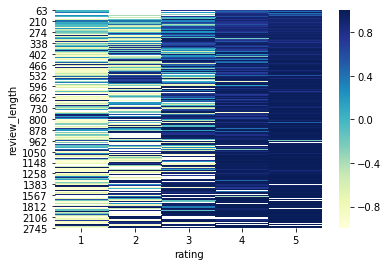

In [0]:
heatmap1_data = pd.pivot_table(hm, values='vader_score', 
                     index=['review_length'], 
                     columns='rating')
sns.heatmap(heatmap1_data, cmap="YlGnBu")

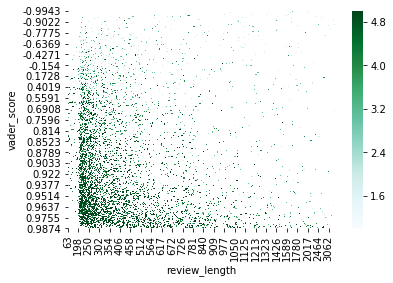

In [0]:
df2 = hm[['rating', 'vader_score', 'review_length']]
heatmap2_data = pd.pivot_table(hm, values='rating', 
                     index=['vader_score'], 
                     columns='review_length')

sns.heatmap(heatmap2_data, cmap="BuGn")

#### **c) number of review vs. score**

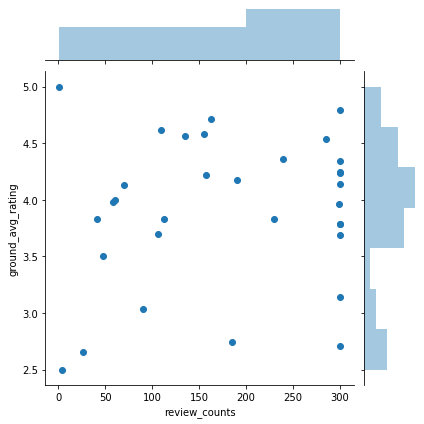

In [0]:
sns.jointplot(x = review_counts.review_counts, y = ground_mean_rating.ground_avg_rating, kind = 'scatter')

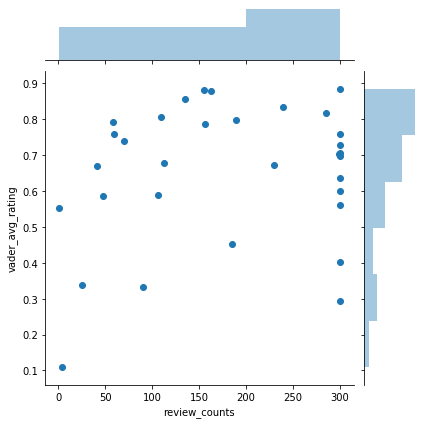

In [0]:
sns.jointplot(x = review_counts.review_counts, y = vader_mean_rating.vader_avg_rating, kind = 'scatter')